In [56]:
import sys
sys.path.insert(0, '/Users/ruitong/scDiffEq')
from scDiffEq_simulation import *
device = "cpu"

Do some quick training:

Viz some simple attributes from passing forward through a trained model:

In [61]:
sde = neural_diffeq(in_dim=50,
                    out_dim=50,
                    mu={1: [400, 400]},
                    sigma={1: [400, 400], 2: [400, 400]},
                   )
sde2 = neural_diffeq(in_dim=50,
                    out_dim=50,
                    mu={1: [800, 800], 2: [800, 800]},
                    sigma={1: [400, 400], 2: [400, 400]},
                   )
sde3 = neural_diffeq(in_dim=50,
                    out_dim=50,
                    mu={1: [800, 800]},
                    sigma={1: [400, 400], 2: [400, 400]},
                   )
sde2.load_state_dict(torch.load("scdiffeq_model_checkpoint.pt",map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
sde.load_state_dict(torch.load("/Users/ruitong/Downloads/train.best.pt",map_location=torch.device('cpu')))

In [2]:
test = torch.load("/Users/ruitong/Downloads/train.best.pt",map_location=torch.device('cpu'))

In [12]:
test2 = torch.load("scdiffeq_model_checkpoint.pt",map_location=torch.device('cpu'))

In [51]:
[i.shape for  i in list(test["model_state_dict"].values())]

[torch.Size([400, 50]),
 torch.Size([400]),
 torch.Size([400, 400]),
 torch.Size([400]),
 torch.Size([1, 400])]

In [52]:
[i.shape for  i in list(test2.values())]

[torch.Size([800, 50]),
 torch.Size([800]),
 torch.Size([800, 800]),
 torch.Size([800]),
 torch.Size([800, 800]),
 torch.Size([800]),
 torch.Size([50, 800]),
 torch.Size([50]),
 torch.Size([400, 50]),
 torch.Size([400]),
 torch.Size([400, 400]),
 torch.Size([400]),
 torch.Size([400, 400]),
 torch.Size([400]),
 torch.Size([50, 400]),
 torch.Size([50])]

In [57]:
h5adf = "Weinreb2020.adata.h5ad" if not exists("Weinreb2020_newpca.adata.h5ad") else "Weinreb2020_newpca.adata.h5ad"
adata = read_h5ad(h5adf)
idx = pickle.load(open("toytest_2k.pickle", "rb"))
pca_model = pickle.load(open("PCA_WholeLarry_scalar.pickle", "rb"))
umap_model = pickle.load(open("UMAP_WholeLarry_PCA.pickle", "rb"))
t = torch.linspace(0,0.02,20)

In [58]:
clonesSize = adata.obs.groupby("clone_idx").size()
FilterClones = clonesSize[clonesSize>3].index = clonesSize[clonesSize>3].index
StartCellCand = adata.obs[(adata.obs["Time point"]==2) & 
          (adata.obs.Annotation=="undiff")&
          (adata.obs.clone_idx.notnull())&
          (adata.obs.clone_idx.isin(FilterClones))].index
ZoomStart = StartCellCand.intersection(idx)

In [60]:
cl = adata[ZoomStart[0]].obs.clone_idx
adata.obs[adata.obs.clone_idx.isin(cl)].sort_values(["Time point","Annotation"])

,Time point,Population,Annotation,Well,cell_idx,clone_idx,cytotrace,cytotrace_rank,cytotrace_GCS,neu_mo_mask,smoothed_groundtruth_from_heldout,PBA_predictions,FateID_predictions,WOT_predictions,early_cells,heldout_mask,outliers,has_fate_mask,early_neu_mo,neu_vs_mo_percent
13484,2.0,LK,undiff,0,13484,3425.0,0.891892,892.0,2.798798,True,0.886243,0.621432,0.850735,0.835521,0.0,1.0,0.0,1,0,0.571429
15077,2.0,LK,undiff,0,15077,3425.0,0.880881,881.0,1.351902,True,0.861961,0.697929,0.907431,0.880937,0.0,0.0,0.0,1,0,0.571429
15620,2.0,LK,undiff,0,15620,3425.0,0.716717,717.0,1.192772,True,0.667563,0.636920,0.774838,0.730935,0.0,1.0,0.0,1,0,0.571429
19287,2.0,LK,undiff,0,19287,3425.0,0.972973,973.0,2.544380,True,0.782516,0.629000,0.865614,0.809006,0.0,1.0,0.0,1,0,0.571429
28362,4.0,LK,Monocyte,1,28362,3425.0,0.316316,317.0,1.287413,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000
11190,4.0,LK,Neutrophil,2,11190,3425.0,0.200200,201.0,0.855585,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000
11967,4.0,LK,Neutrophil,2,11967,3425.0,0.346346,347.0,1.354061,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000
21920,4.0,LK,Neutrophil,2,21920,3425.0,0.330330,331.0,1.372539,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000
22153,4.0,LK,Neutrophil,2,22153,3425.0,0.509510,510.0,1.316432,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000
11684,4.0,LK,undiff,2,11684,3425.0,0.195195,196.0,0.784636,True,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1,-1,-1.000000


In [7]:
#tind = [3,59,65,58,68,23,74,58,29,637,398,29,500,378,529,639,873]
#y0 = torch.Tensor(adata[idx[tind[-1]]].obsm['X_pca']).to(device)
y0 = torch.Tensor(adata[ZoomStart[0]].obsm['X_pca']).to(device)

In [14]:
ySimu_List= sdeCompare(sde,y0,t,r=30,a=2.2)

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 174.87it/s]


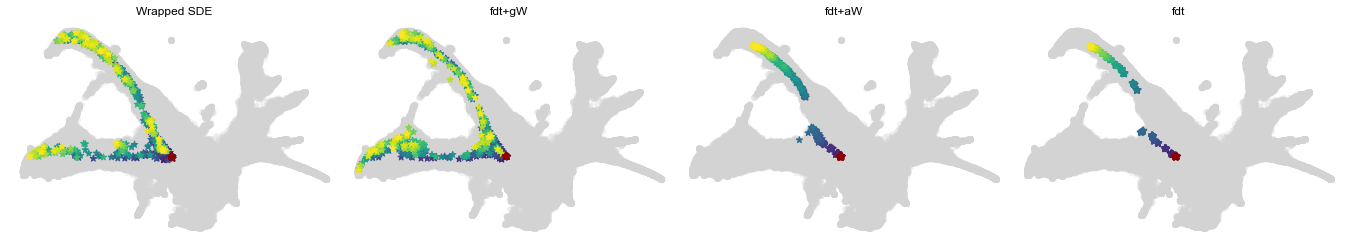

In [15]:
testFig = UampSDE(adata,umap_model,ySimu_List,
       labels = ["Wrapped SDE",'fdt+gW',"fdt+aW","fdt"])

In [16]:
fig.save()
plt.savefig()
rasterized=True

AttributeError: 'list' object has no attribute 'fig'

+ g: batch_size, state_size, brownian_size
+ W.unsqueeze(-1): batch_size, brownian_size, 1
+ bmm(g,W.unsqueeze(-1)) = batch_size, state_size,1
+ bmm(g,W.unsqueeze(-1)).squeeze(-1) = batch_size, state_size